# Reading CSV, CCTV Status of Seoul City

## Loading Data 

[공공데이터포털](https://data.go.kr)

Recommend getting Comma Seperated Values

## Getting District CCTV Informations

https://www.data.go.kr/dataset/3073216/fileData.do

## Load Pandas

In [1]:
import pandas as pd

In [2]:
CCTV = pd.read_csv("seoulYearlyCCTV.csv", encoding="utf-8")
CCTV.head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## Check Data Columns

In [3]:
CCTV.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

## Change Column Name

In [4]:
CCTV.rename(columns={CCTV.columns[0]: "구"}, inplace=True)
CCTV.head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## Load Excel File - Load Population

### Install xlrd

In [5]:
!pip install xlrd || pip3 install xlrd

/bin/sh: pip: command not found


### Loading Excel

In [6]:
population = pd.read_excel("seoulPopulation.xls")
population.head(5)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2016.4/4,합계,4189839,10204057,5007379,5196678,9930616,4876789,5053827,273441,130590,142851,2.37,1300877
3,2016.4/4,종로구,72118,161922,79322,82600,152737,75201,77536,9185,4121,5064,2.12,25091
4,2016.4/4,중구,59651,134409,66452,67957,125249,62204,63045,9160,4248,4912,2.1,20606


### Loading with Options

In [7]:
population = pd.read_excel(
    "seoulPopulation.xls",     # FileName
    header = 2,                # row number of header
    usecols = "B, D, G, J, N", # only load these columns (comma seperated)
    encoding = "utf-8"         # encoding type
)

population.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10204057,9930616,273441,1300877
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262


## Change Column Name, Again

In [8]:
population.rename(
    columns={
        population.columns[1]: "전체인구",
        population.columns[2]: "한국인",
        population.columns[3]: "외국인",
        population.columns[4]: "고령자"
    },
    inplace=True # 덮어쓰기
)
population.head()

,자치구,전체인구,한국인,외국인,고령자
0,합계,10204057,9930616,273441,1300877
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262


## Analyze CCTV Data

In [9]:
CCTV.head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### Sorting By Values
= ORDER BY

In [10]:
CCTV.sort_values(by=['소계']).head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [11]:
CCTV.sort_values(by=['소계'],ascending=False).head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


### Add Column

In [12]:
CCTV['최근증가율'] = ((CCTV['2016년'] + CCTV['2015년'] + CCTV['2014년']) / CCTV['2013년도 이전']) * 100

In [13]:
CCTV.sort_values(by=['최근증가율'], ascending=False).head(5)

,구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## Analyze Population Data

In [14]:
population.head(5)

,자치구,전체인구,한국인,외국인,고령자
0,합계,10204057,9930616,273441,1300877
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262


In [15]:
wa = population.where(population['자치구'] == "합계").dropna().index
population.drop(wa, inplace=True)
population.head(5)

,자치구,전체인구,한국인,외국인,고령자
1,종로구,161922,152737,9185,25091
2,중구,134409,125249,9160,20606
3,용산구,245102,230241,14861,35915
4,성동구,307161,299259,7902,39262
5,광진구,372104,357215,14889,41441


In [16]:
# Check Data is Unique
population['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [17]:
population['외국인비율'] = population['외국인'] / population['전체인구'] * 100
population['고령자비율'] = population['고령자'] / population['전체인구'] * 100
population.head(5)

,자치구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161922,152737,9185,25091,5.672484,15.495733
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083
4,성동구,307161,299259,7902,39262,2.572592,12.782222
5,광진구,372104,357215,14889,41441,4.001301,11.136940


In [18]:
population.sort_values(by='전체인구',ascending=False).head(5)

,자치구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,664946,657831,7115,71064,1.070012,10.687184
16,강서구,602104,595485,6619,71062,1.099312,11.802280
23,강남구,572140,567115,5025,61931,0.878282,10.824449
11,노원구,571212,567581,3631,70887,0.635666,12.409928
21,관악구,525607,506851,18756,66952,3.568446,12.738034


In [19]:
population.sort_values(by='외국인',ascending=False).head(5)

,자치구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,406779,370613,36166,51844,8.890823,12.745004
17,구로구,449600,417551,32049,55705,7.128336,12.389902
18,금천구,254654,235386,19268,32279,7.566345,12.675630
21,관악구,525607,506851,18756,66952,3.568446,12.738034
6,동대문구,370312,355069,15243,53460,4.116259,14.436475


In [20]:
population.sort_values(by='외국인비율',ascending=False).head(5)

,자치구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,406779,370613,36166,51844,8.890823,12.745004
18,금천구,254654,235386,19268,32279,7.566345,12.675630
17,구로구,449600,417551,32049,55705,7.128336,12.389902
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083


In [21]:
population.sort_values(by='고령자',ascending=False).head(5)

,자치구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율
12,은평구,495937,491476,4461,71457,0.899509,14.408483
24,송파구,664946,657831,7115,71064,1.070012,10.687184
16,강서구,602104,595485,6619,71062,1.099312,11.802280
11,노원구,571212,567581,3631,70887,0.635666,12.409928
21,관악구,525607,506851,18756,66952,3.568446,12.738034


In [22]:
population.sort_values(by='고령자비율',ascending=False).head(5)

,자치구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330704,327195,3509,54053,1.061070,16.344828
1,종로구,161922,152737,9185,25091,5.672484,15.495733
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083
13,서대문구,325871,314194,11677,47653,3.583320,14.623271


## Merge DataFrames

In [23]:
population.rename(
    columns={
        population.columns[0]:"구"
    },
    inplace=True
)
population.head(5)

,구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161922,152737,9185,25091,5.672484,15.495733
2,중구,134409,125249,9160,20606,6.815020,15.330819
3,용산구,245102,230241,14861,35915,6.063190,14.653083
4,성동구,307161,299259,7902,39262,2.572592,12.782222
5,광진구,372104,357215,14889,41441,4.001301,11.136940


In [24]:
data = pd.merge(population, CCTV, how='inner', on="구")
data.head(5)

,구,전체인구,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,종로구,161922,152737,9185,25091,5.672484,15.495733,1619,464,314,211,630,248.922414
1,중구,134409,125249,9160,20606,6.815020,15.330819,1023,413,190,72,348,147.699758
2,용산구,245102,230241,14861,35915,6.063190,14.653083,2096,1368,218,112,398,53.216374
3,성동구,307161,299259,7902,39262,2.572592,12.782222,1327,730,91,241,265,81.780822
4,광진구,372104,357215,14889,41441,4.001301,11.136940,878,573,78,53,174,53.228621


In [25]:
data.set_index("구", inplace=True)
data.head(5)

,전체인구,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
구,,,,,,,,,,,,
종로구,161922,152737,9185,25091,5.672484,15.495733,1619,464,314,211,630,248.922414
중구,134409,125249,9160,20606,6.815020,15.330819,1023,413,190,72,348,147.699758
용산구,245102,230241,14861,35915,6.063190,14.653083,2096,1368,218,112,398,53.216374
성동구,307161,299259,7902,39262,2.572592,12.782222,1327,730,91,241,265,81.780822
광진구,372104,357215,14889,41441,4.001301,11.136940,878,573,78,53,174,53.228621


In [26]:
del data['2013년도 이전']
del data['2014년']
del data['2015년']
del data['2016년']
data.head()

,전체인구,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
구,,,,,,,,
종로구,161922,152737,9185,25091,5.672484,15.495733,1619,248.922414
중구,134409,125249,9160,20606,6.815020,15.330819,1023,147.699758
용산구,245102,230241,14861,35915,6.063190,14.653083,2096,53.216374
성동구,307161,299259,7902,39262,2.572592,12.782222,1327,81.780822
광진구,372104,357215,14889,41441,4.001301,11.136940,878,53.228621


## Draw Graph using Matplotlib

### Setting Fonts

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

winPath = "c:/Windows/Fonts/malgun.ttf"
linuxFont = ""

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family="AppleGothic")
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=winPath).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    print("Setting Font as", linuxFont)
    rc('font', family=linuxFont)
else:
    print("Woops! Failed to detect platform.system()")

### Drawing Heatmap

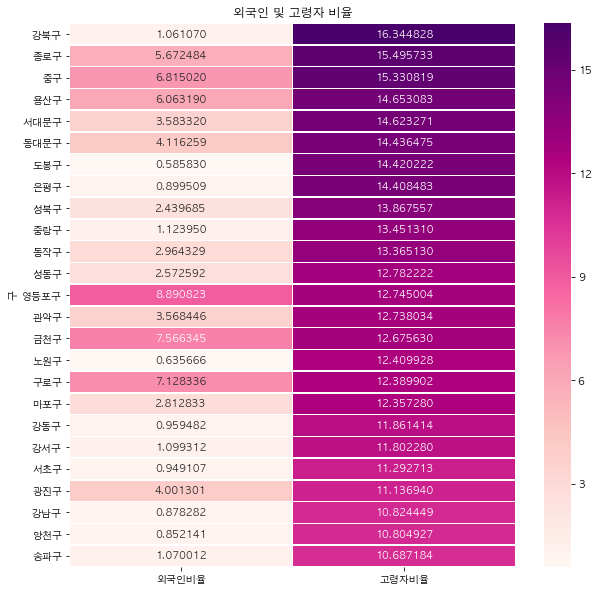

In [33]:
target_col = ['외국인비율', '고령자비율']

data_sorted = data.sort_values(by='고령자비율', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(data_sorted[target_col], annot=True, fmt='f', linewidths=.5, cmap='RdPu')

plt.title('외국인 및 고령자 비율')
plt.show()

### Correlation coefficient

If absolute of correlation coefficient is...  
0 <= corrcoef < 0.2: Not Related.  
0.2 <= corrcoef < 0.5: Slightly Related.  
0.5 <= corrcoef < 1.0: Very Related.  

#### Import Numpy

In [34]:
import numpy as np

#### Getting Correlation Coefficient

In [35]:
np.corrcoef(data['고령자비율'], data['소계'])

array([[ 1.        , -0.26057098],
       [-0.26057098,  1.        ]])

0.26: Very Slightly Related (Negative)

In [36]:
np.corrcoef(data['외국인비율'], data['소계'])

array([[ 1.        , -0.05261233],
       [-0.05261233,  1.        ]])

0.05: Not Related

In [39]:
np.corrcoef(data['전체인구'], data['소계'])

array([[1.        , 0.24806123],
       [0.24806123, 1.        ]])

0.24: Very Slightly Related

## Analyze CCTV and Populations

In [40]:
data.head()

,전체인구,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
구,,,,,,,,
종로구,161922,152737,9185,25091,5.672484,15.495733,1619,248.922414
중구,134409,125249,9160,20606,6.815020,15.330819,1023,147.699758
용산구,245102,230241,14861,35915,6.063190,14.653083,2096,53.216374
성동구,307161,299259,7902,39262,2.572592,12.782222,1327,81.780822
광진구,372104,357215,14889,41441,4.001301,11.136940,878,53.228621


### Import matplotlib

In [41]:
import matplotlib.pyplot as plt

#### Setting Fonts

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

winPath = "c:/Windows/Fonts/malgun.ttf"
linuxFont = ""

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family="AppleGothic")
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=winPath).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    print("Setting Font as", linuxFont)
    rc('font', family=linuxFont)
else:
    print("Woops! Failed to detect platform.system()")

### Drawing Graph

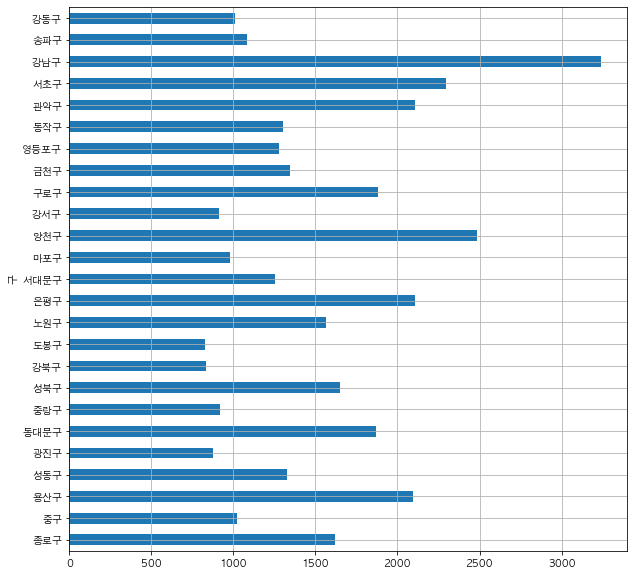

In [43]:
plt.figure()
data['소계'].plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

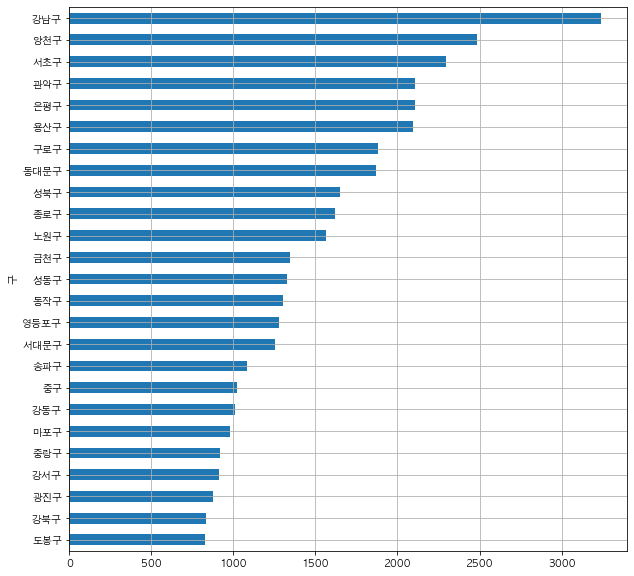

In [44]:
plt.figure()
data['소계'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

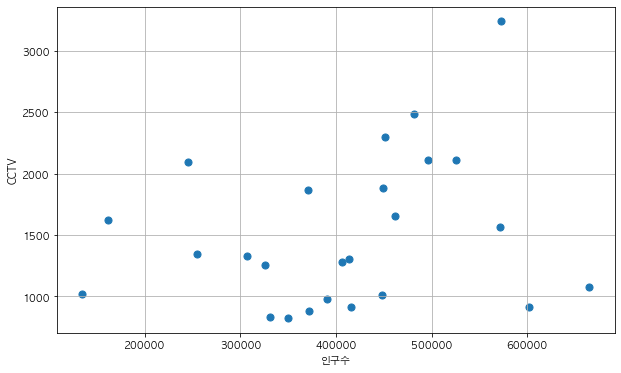

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(data['전체인구'],data['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### Run Polyfit

polyfitted data must be **correlated**

In [48]:
fp1 = np.polyfit(data['전체인구'], data['소계'], 1)
fp1

array([1.17459847e-03, 1.03589321e+03])

In [53]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

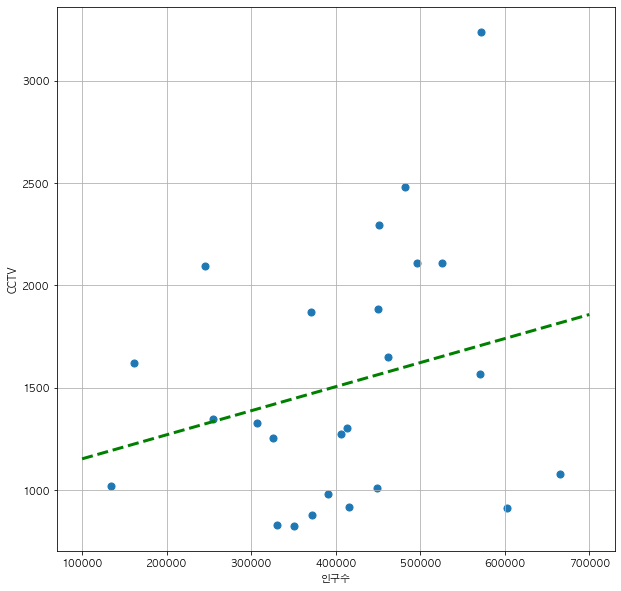

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(data['전체인구'], data['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## CCTV amount and Error Data in Graph

In [60]:
fp1 = np.polyfit(data['전체인구'], data['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data['오차'] = np.abs(data['소계'] - f1(data['전체인구']))

df_sort = data.sort_values(by='오차', ascending=False)
df_sort.head()

,전체인구,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율,오차
구,,,,,,,,,
강남구,572140,567115,5025,61931,0.878282,10.824449,3238,150.619195,1530.072021
양천구,481845,477739,4106,52063,0.852141,10.804927,2482,34.671731,880.132390
강서구,602104,595485,6619,71062,1.099312,11.802280,911,134.793814,832.123647
용산구,245102,230241,14861,35915,6.063190,14.653083,2096,53.216374,772.210355
송파구,664946,657831,7115,71064,1.070012,10.687184,1081,104.347826,735.937764


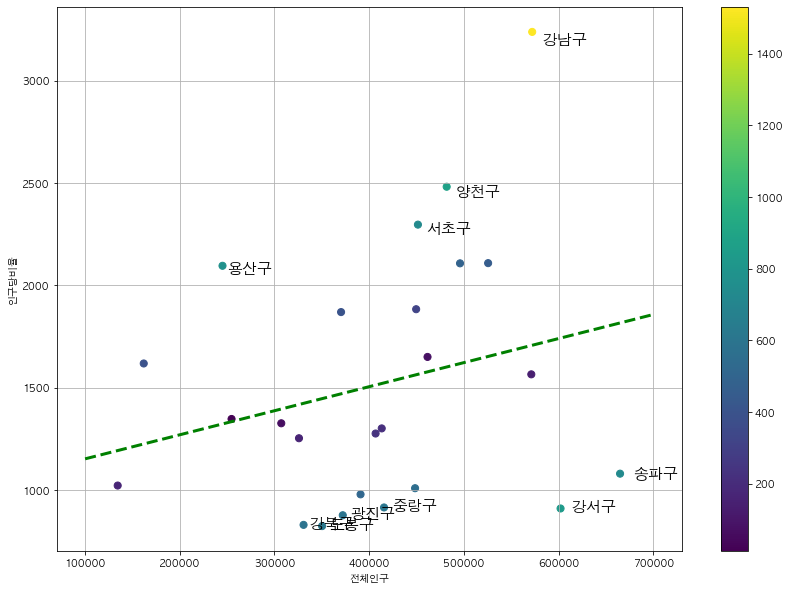

In [61]:
plt.figure(figsize=(14,10))
plt.scatter(data['전체인구'], data['소계'], 
            c=data['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['전체인구'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('전체인구')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()